In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import requests
import time

# Import the .csv file as a DataFrame
sourcepath=Path("Resources/winemag-data.csv")
df_wine_nan=pd.read_csv(sourcepath)

df_wine_nan.count()

country        280833
description    280901
designation    197701
points         280901
price          258210
province       280833
region_1       234594
region_2       111464
variety        280900
winery         280901
dtype: int64

In [93]:
df_wine=df_wine_nan.dropna(subset=['country','province','price','variety']) 
df_wine.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [94]:
df_wine.drop_duplicates(inplace=True)
df_wine.count()

C:\Users\arlen.CORP\AppData\Local\Continuum\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


country        157633
description    157633
designation    110755
points         157633
price          157633
province       157633
region_1       132009
region_2        67318
variety        157633
winery         157633
dtype: int64

In [ ]:
df_mean=pd.DataFrame(df_wine.groupby(['country','province'],as_index=False).mean()).rename(columns = {'points':'avg points',
                                                                                       'price':'avg price'})

df_mean.head()

In [ ]:
df_mean['Lat'] = ""
df_mean['Lng'] = ""
df_mean.head()

In [ ]:
gkey="Your Goog"
def geoCodeLocation(country, province):
    try:
        target_city = f"{country}, {province}"
        target_url = 'https://maps.googleapis.com/maps/api/geocode/json?address={0}&key={1}'.format(target_city, gkey)
        geo_data = requests.get(target_url).json()
        print(target_url)
        lat = geo_data["results"][0]["geometry"]["location"]["lat"]
        lng = geo_data["results"][0]["geometry"]["location"]["lng"]
        return (lat,lng)
    except (KeyError, IndexError):
        return (0,0)

df_mean['Lat'],df_mean['Lng'] = zip(*df_mean.apply(lambda row: geoCodeLocation(row['country'], row['province']), axis=1))


In [85]:
df_mean.head()

NameError: name 'df_mean' is not defined

In [96]:
df_mean.to_csv("Resources/winemag-mean_noDups_Coordinates.csv", encoding='utf-8',index=False)

NameError: name 'df_mean' is not defined

In [97]:
sourcepath=Path("Resources/winemag-mean_noDups_Coordinates.csv")
df_wine=pd.read_csv(sourcepath)

df_wine=df_wine[df_wine['Lat']!=0]
df_wine.head()
df_wine.count()

country       478
province      478
avg points    478
avg price     478
Lat           478
Lng           478
dtype: int64

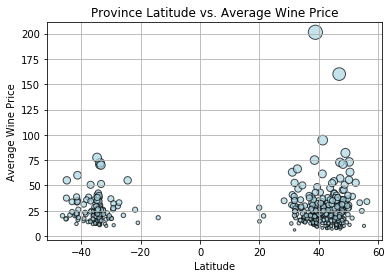

In [107]:
# Build a scatter plot for each data type

plt.scatter(df_wine["Lat"], df_wine["avg price"],s=df_wine["avg price"], marker="o",facecolors="lightblue",alpha=0.7, edgecolors="black")

# Incorporate the other graph properties
plt.title("Province Latitude vs. Average Wine Price")
plt.ylabel("Average Wine Price")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Province Latitude vs. Average Wine Price Plot.png")

# Show plot
plt.show()

In [ ]:
# Build a scatter plot for each data type
plt.scatter(df_wine["Lat"], df_wine["Lng"],s=df_wine["avg price"]*10, marker="o",facecolors="lightblue",alpha=0.7, edgecolors="black")

# Incorporate the other graph properties
plt.title("Province Location on Average Wine Price")
plt.ylabel("Longitude")
plt.xlabel("Latitude")

plt.text(0.93, 0.5, 'Note:\nCircle size correlates with avg price per Location.', fontsize=10, transform=plt.gcf().transFigure)

plt.grid(True)

# Save the figure
plt.savefig("output_data/Province Location on Average Wine Price Plot.png",dpi=300, bbox_inches = "tight")

# Show plot
plt.show()